# Some imports and helper code

In [719]:
import os
import pickle
import seaborn
import numpy as np
import pandas as pd
import scipy as sci
import networkx as nx
import numpy.linalg as LIN
import matplotlib.pylab as plt
from utils import *
np.random.seed(1)

%matplotlib inline 
%load_ext autoreload

plt.style.use('seaborn-paper')
seaborn.set_context('paper', font_scale=2.2)
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.weight'] = 'medium'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Simulation results of epidemic spreading

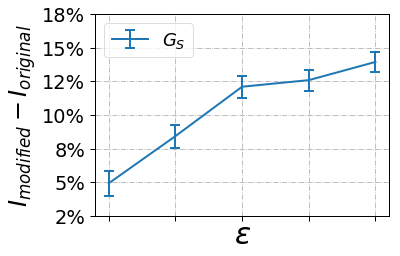

In [813]:
graph_type = 'Email'
graph_weight = 'unweighted'
mode = 'min_eigcent_SP'
GAMMA = 0.24
TAU = 0.06
numExp = 1 if graph_type in ['Email', 'Airport', 'Protein', 'Brain'] else 30


min_budget = {
    'BA': 0.0657,
    'Small-World': 0.2032,
    'BTER': 0.0585,
    'Airport': 0.4061,
    'Brain': 0.1433
}


with open('../result/{}/{}/{}-SIS/Gamma-{:.2f}---Tau-{:.2f}-robustness/{}_numExp_{}_SIS_equalAlpha.p'.format(\
                                                graph_weight, mode, graph_type, GAMMA, TAU, graph_type, numExp), 'rb') as fid:
    data = pickle.load(fid)
data = data[~(data['ratio targets'].isin([0]) & data['ratio bystanders'].isin([0]))]
data = data.dropna()


SP_err = []
Key = 'ratio bystanders'
for budget in [0.1, 0.2, 0.3, 0.4, 0.5]:
    a = data[data['graph'].isin(['attacked']) & data['budget'].isin([budget])][Key] 
    a.index = range(len(a))
    b = data[data['graph'].isin(['original']) & data['budget'].isin([budget])][Key]
    b.index = range(len(b))
    SP_err.append((a-b).sem() * 1.96)
    
S_err = []
Key = 'ratio targets'
for budget in [0.1, 0.2, 0.3, 0.4, 0.5]:
    a = data[data['graph'].isin(['attacked']) & data['budget'].isin([budget])][Key] 
    a.index = range(len(a))
    b = data[data['graph'].isin(['original']) & data['budget'].isin([budget])][Key]
    b.index = range(len(b))
    S_err.append((a-b).sem() * 1.96)
    
    
S_attacked = data.pivot_table(index=['graph', 'budget'])['ratio targets']['attacked']
S_original = data.pivot_table(index=['graph', 'budget'])['ratio targets']['original']

SP_attacked = data.pivot_table(index=['graph', 'budget'])['ratio bystanders']['attacked']
SP_original = data.pivot_table(index=['graph', 'budget'])['ratio bystanders']['original']

S_diff  = S_attacked - S_original
SP_diff = SP_attacked - SP_original

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

# x = [0.1, 0.2, 0.3, 0.4, 0.5]
x = [0.1, 0.2, 0.3, 0.4, 0.5]
plt.errorbar(x, S_diff, yerr=S_err, label='$G_S$', linewidth=2, markersize=7, capsize=5, elinewidth=2, markeredgewidth=2)
# plt.errorbar(x, SP_diff, yerr=SP_err, label='$G_{S\'}$', linewidth=2, markersize=7, capsize=5, elinewidth=2, markeredgewidth=2)
plt.xticks(x, [ '10%', '20%', '30%', '40%', '50%'])
# plt.axvline(x=min_budget[graph_type], linestyle='-.', color='r')
ax = plt.gca()
plt.yticks(ax.get_yticks(),  ['%.0f%%' % (i*100) for i in ax.get_yticks()])
plt.xlabel('$\epsilon$', fontsize=30)
plt.ylabel('$I_{modified} - I_{original}$', fontsize=24)
plt.legend(loc='upper left', prop={'weight':'bold', 'size': 18})
plt.grid(linestyle='-.')
plt.tight_layout()
# plt.savefig('../result/figure/{}/{}_numExp_{}_{}_overall.pdf'.format(graph_weight, graph_type, numExp, graph_weight))

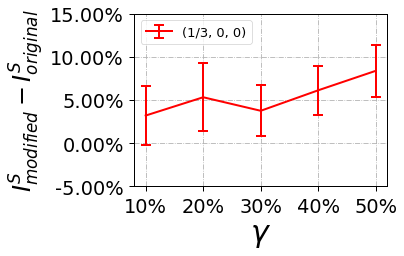

In [780]:
## Control experiments

graph_type = 'Airport'
TARGET = '3rd'
graph_weight = 'weighted'
mode = 'min_eigcent_SP'
GAMMA = 0.5
TAU = 0.1

numExp = 1 if graph_type in ['Email', 'Airport', 'Protein', 'Brain'] else 30
Key = 'ratio targets' if TARGET not in ['2nd'] else 'ratio bystanders'
target_mapping = {
    '1st': ['alpha2=0', 'alpha3=1'],
    '2nd': ['equalAlpha', 'alpha2=0'],
    '3rd': ['alpha2=0', 'alpha1=1'],
}
################################################################################################

with open('../result/{}/{}/{}-SIS/Gamma-{:.2f}---Tau-{:.2f}/{}_numExp_{}_SIS_{}.p'.format(\
                                                graph_weight, mode, graph_type, GAMMA, TAU, graph_type, numExp, target_mapping[TARGET][0]), 'rb') as fid:
    data = pickle.load(fid)
data = data[~(data['ratio targets'].isin([0]) & data['ratio bystanders'].isin([0]))]
data = data.dropna()

S_err = []
for budget in [0.1, 0.2, 0.3, 0.4, 0.5]:
    a = data[data['graph'].isin(['attacked']) & data['budget'].isin([budget])][Key] 
    a.index = range(len(a))
    b = data[data['graph'].isin(['original']) & data['budget'].isin([budget])][Key]
    b.index = range(len(b))
    S_err.append((a-b).sem() * 1.96)
    
################################################################################################
## control experiments ##

with open('../result/{}/{}/{}-SIS/Gamma-{:.2f}---Tau-{:.2f}/{}_numExp_{}_SIS_{}.p'.format(\
                                                graph_weight, mode, graph_type, GAMMA, TAU, graph_type, numExp, target_mapping[TARGET][1]), 'rb') as fid:
    data_alpha3_zero = pickle.load(fid)
data_alpha3_zero = data_alpha3_zero[~(data_alpha3_zero['ratio targets'].isin([0]) & data_alpha3_zero['ratio bystanders'].isin([0]))]
data_alpha3_zero = data_alpha3_zero.dropna()
    
S_err_alpha3_zero = []
for budget in [0.1, 0.2, 0.3, 0.4, 0.5]:
    a = data_alpha3_zero[data_alpha3_zero['graph'].isin(['attacked']) & data_alpha3_zero['budget'].isin([budget])][Key] 
    a.index = range(len(a))
    b = data_alpha3_zero[data_alpha3_zero['graph'].isin(['original']) & data_alpha3_zero['budget'].isin([budget])][Key]
    b.index = range(len(b))
    S_err_alpha3_zero.append((a-b).sem() * 1.96)
    
################################################################################################

S_attacked = data.pivot_table(index=['graph', 'budget'])[Key]['attacked']
S_original = data.pivot_table(index=['graph', 'budget'])[Key]['original']
S_diff  = S_attacked - S_original

S_attacked_control = data_alpha3_zero.pivot_table(index=['graph', 'budget'])[Key]['attacked']
S_original_control = data_alpha3_zero.pivot_table(index=['graph', 'budget'])[Key]['original']
S_diff_control = S_attacked_control - S_original_control


x = [0.1, 0.2, 0.3, 0.4, 0.5]
legend_mapping = {
    '1st': ['(1/3, 0, 1/3)', '(0, 0, 1/3)'],
    '2nd': ['(1/3, 1/3, 1/3)', '(1/3, 0, 1/3)'],
    '3rd': ['(1/3, 0, 1/3)', '(1/3, 0, 0)'],
}
# plt.errorbar(x, S_diff, yerr=S_err, label=legend_mapping[TARGET][0], linewidth=2, markersize=7, 
#              capsize=5, elinewidth=2, markeredgewidth=2)
plt.errorbar(x, S_diff_control, yerr=S_err_alpha3_zero, label=legend_mapping[TARGET][1], linewidth=2, markersize=7, \
             capsize=5, elinewidth=2, markeredgewidth=2, color='r')
plt.xticks(x, ['10%', '20%', '30%', '40%', '50%'])
ax = plt.gca()
plt.yticks(ax.get_yticks(),  ['%.2f%%' % (i*100) for i in ax.get_yticks()])
plt.xlabel('$\gamma$', fontsize=30)
if TARGET in ['1st', '3rd']:
    plt.ylabel('$I_{modified}^S - I_{original}^{S}$', fontsize=24)
else:
    plt.ylabel('$I_{modified}^{S\'} - I_{original}^{S\'}$', fontsize=24)
plt.legend(fontsize=13, loc='upper left')
plt.grid(linestyle='-.')
plt.tight_layout()
# plt.savefig('../result/figure/{}/{}_numExp_{}_controlExp_{}_{}_higherThreshold.pdf'.format(graph_weight, graph_type, numExp, graph_weight, TARGET))

In [275]:
### the statisticas about the largest eigenvlaues of BTER networks ###
import seaborn
n = 375
ret = []
for i in range(30):
    G = nx.read_edgelist('../data/BTER_{:02d}.txt'.format(i), nodetype=int)
    adj = nx.adjacency_matrix(G).todense()
    lambda1 = LIN.eig(adj)[0].max()
    ret.append(np.real(lambda1))
print(np.min(ret))
print(np.max(ret))

14.415055658217216
16.57809155392885


In [651]:
### the density of S/S' as the attacker's budget increases ###

graph_type = 'Airport'
graph_weight = 'unweighted'
numExp = 1 if graph_type in ['Email', 'Airport', 'Protein', 'Brain'] else 30
mode = 'min_eigcent_SP'
folder = '../result/{}/{}'.format(graph_weight, mode)
Key = 'equalAlpha'
graph_name = ['original', 'attacked']

with open(os.path.join(folder, '{}_numExp_{}_attacked_graphs_{}.p'.format(graph_type, numExp, Key)), 'rb') as fid:
    data = pickle.load(fid)

ret = []
for budget in [0.1, 0.2, 0.3, 0.4, 0.5]:
    for gn in graph_name:
        for exp in range(numExp):
            G = data[budget][exp][gn]
            S = [i for i in range(G.order()) if G.nodes[i]['target']]
            G_S = G.subgraph(S)
            ret.append((nx.density(G_S), gn, budget))
ret = pd.DataFrame(ret, columns=['S-density', 'graph', 'budget'])
y = ret.groupby(['graph', 'budget']).mean()
print(len(S))

17


In [802]:
### the largest eigenvalue of G as the attacker's budget increases ###

graph_type = 'Airport'
numExp = 1 if graph_type in ['Email', 'Airport', 'Protein', 'Brain'] else 30
graph_weight = 'weighted'
mode = 'min_eigcent_SP'
folder = '../result/{}/{}'.format(graph_weight, mode)
Key = 'equalAlpha'
graph_name = ['original', 'attacked']

with open(os.path.join(folder, '{}_numExp_{}_attacked_graphs_{}_robustness.p'.format(graph_type, numExp, Key)), 'rb') as fid:
    data = pickle.load(fid)

    
ret = []
for budget in [0.1, 0.2, 0.3, 0.4, 0.5]:
# for budget in [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]:
    for gn in graph_name:
        for exp in range(numExp):
            G = data[budget][exp][gn]
            adj = nx.adjacency_matrix(G).todense()
            deg = adj * np.ones((len(G), 1))
            maxDeg = np.max(deg)
            lambda1 = np.real(LIN.eig(adj)[0].max())
            
            S = [i for i in range(G.order()) if G.nodes[i]['target']]
            G_S = G.subgraph(S)
            adj_S = nx.adjacency_matrix(G_S).todense()
            S_deg = adj_S * np.ones((len(S), 1))
            avgDeg_S = np.sum(S_deg) / len(S)
            lambda1_S = np.real(LIN.eig(adj_S)[0].max())
            
            SP = [i for i in range(G.order()) if not G.nodes[i]['target']]
            G_SP = G.subgraph(SP)
            adj_SP = nx.adjacency_matrix(G_SP).todense()
            lambda1_SP = np.real(LIN.eig(adj_SP)[0].max())
            
            if gn == 'original':
                minEpsilon = np.sqrt(LIN.norm(S_deg, 2)**2 / len(S) - np.sum(S_deg)**2 / len(S)**2)
                avaEpsilon = lambda1 * budget
            else:
                minEpsilon = 0
                avaEpsilon = 0       
            ret.append((lambda1, lambda1_S, maxDeg, avgDeg_S, minEpsilon, avaEpsilon, gn, budget))
            
ret = pd.DataFrame(ret, columns=['lambda1', 'lambda1_S', 'max_deg', 'avg_deg_S', 'min_epsilon', 'avaEpsilon', 'graph', 'budget'])
y = ret.groupby(['graph', 'budget']).mean()
print(y)

                   lambda1  lambda1_S    max_deg  avg_deg_S  min_epsilon  \
graph    budget                                                            
attacked 0.1      8.438892   6.933205  30.078165   3.332588     0.000000   
         0.2      8.952525   7.687023  31.356255   3.649285     0.000000   
         0.3      9.560199   8.491890  32.840377   3.987237     0.000000   
         0.4     10.189033   9.264609  34.373131   4.309641     0.000000   
         0.5     10.863287  10.050929  36.022018   4.634158     0.000000   
original 0.1      7.995186   6.190697  28.912475   3.022052     3.246701   
         0.2      7.995186   6.190697  28.912475   3.022052     3.246701   
         0.3      7.995186   6.190697  28.912475   3.022052     3.246701   
         0.4      7.995186   6.190697  28.912475   3.022052     3.246701   
         0.5      7.995186   6.190697  28.912475   3.022052     3.246701   

                 avaEpsilon  
graph    budget              
attacked 0.1       0.000000

In [823]:
### stable distribution estimation error

graph_type = 'Airport'
numExp = 1 if graph_type in ['Email', 'Airport', 'Protein', 'Brain'] else 30
graph_weight = 'weighted'
mode = 'min_eigcent_SP'
folder = '../result/{}/{}'.format(graph_weight, mode)
Key = 'equalAlpha'
graph_name = ['original', 'attacked']
GAMMA = 0.5
TAU = 0.1
Ratio = GAMMA / TAU

with open(os.path.join(folder, '{}_numExp_{}_attacked_graphs_{}_robustness.p'.format(graph_type, numExp, Key)), 'rb') as fid:
    data = pickle.load(fid)

for exp in range(numExp):
    comp_ratio = {'original': 0, 'attacked': 0}
    for gn in ['original', 'attacked']:
        G = data[0.1][exp][gn]
        S = [i for i in range(G.order()) if G.nodes[i]['target']]
        G_S = G.subgraph(S)
        adj_S = nx.adjacency_matrix(G_S).todense()
        S_deg = adj_S * np.ones((len(S), 1)) 
        comp_ratio[gn] += len(S) - Ratio * np.sum(1 / S_deg)
        

In [824]:
comp_ratio

{'original': -52235.12224752081, 'attacked': -49636.16927454606}

In [186]:
### the cut (non-normalized) size as the attacker's budget increases ###

graph_type = 'Email'
numExp = 1 if graph_type in ['Email', 'Airport', 'Protein'] else 30
graph_weight = 'unweighted'
mode = 'min_eigcent_SP'
folder = '../result/{}/{}'.format(graph_weight, mode)
Key = 'equalAlpha'
graph_name = ['original', 'attacked']

with open(os.path.join(folder, '{}_numExp_{}_attacked_graphs_{}.p'.format(graph_type, numExp, Key)), 'rb') as fid:
    data = pickle.load(fid)

ret = []
for budget in [0.1, 0.2, 0.3, 0.4, 0.5]:
    for gn in graph_name:
        for exp in range(numExp):
            G = data[budget][exp][gn]
            S = [i for i in range(G.order()) if G.nodes[i]['target']]
            if graph_weight == 'weighted':
                ret.append((nx.cut_size(G, S, weight='weight'), gn, budget))
            else:
                ret.append((nx.cut_size(G, S), gn, budget))
ret = pd.DataFrame(ret, columns=['cut size', 'graph', 'budget'])
y = ret.groupby(['graph', 'budget']).mean()
print(y)

                 cut size
graph    budget          
attacked 0.1          451
         0.2          642
         0.3          928
         0.4         1374
         0.5         1910
original 0.1          419
         0.2          419
         0.3          419
         0.4          419
         0.5          419


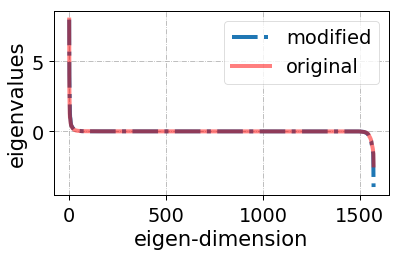

In [164]:
### the spectra before/after attack ###

graph_type = 'Airport'
numExp = 1 if graph_type in ['Email', 'Airport', 'Protein'] else 30
graph_weight = 'weighted'
mode = 'min_eigcent_SP'
folder = '../result/{}/{}'.format(graph_weight, mode)
Key = 'equalAlpha'
graph_name = ['original', 'attacked']
budget = 0.5
exp = 0
# 1489618.0


with open(os.path.join(folder, '{}_numExp_{}_attacked_graphs_{}.p'.format(graph_type, numExp, Key)), 'rb') as fid:
    data = pickle.load(fid)
    
ret = {'attacked': None, 'original': None}
for key, _ in ret.items():
    G = data[budget][exp][key]
    adj = nx.adjacency_matrix(G).todense() 
    eigVals = sorted(np.real(LIN.eig(adj)[0]), reverse=True)
    ret[key] = eigVals

x = range(len(G))
plt.plot(x, ret['attacked'], label='modified', linestyle='-.', linewidth=4)
plt.plot(x, ret['original'], label='original', linewidth=4, alpha=0.5, color='r')
plt.legend()
plt.grid(linestyle='-.')
plt.ylabel('eigenvalues')
plt.xlabel('eigen-dimension')
plt.tight_layout()
plt.savefig('../result/figure/{}/{}_{}_eigen.pdf'.format(graph_weight, graph_type, Key))

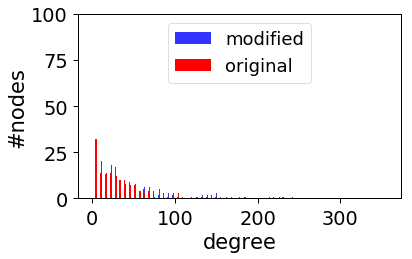

In [373]:
### the degree distributioin before/after attack ###
import collections

graph_type = 'Email'
numExp = 1 if graph_type in ['Email', 'Airport', 'Protein', 'Brain'] else 30
mode = 'min_eigcent_SP'
graph_weight = 'unweighted'
folder = '../result/{}/{}'.format(graph_weight, mode)
Key = 'equalAlpha'
graph_name = ['attacked', 'original']
budget = 0.5
exp = 0 if graph_type in ['Email', 'Airport', 'Protein', 'Brain'] else 10
# 1489618.0


with open(os.path.join(folder, '{}_numExp_{}_attacked_graphs_{}.p'.format(graph_type, numExp, Key)), 'rb') as fid:
    data = pickle.load(fid)
    
plt.figure(figsize=(6,4))
deg_dist = {'attacked': None, 'original': None}
for gn in graph_name:
    G = data[budget][exp][gn]
#     degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    deg_seq = nx.adjacency_matrix(G).todense() * np.matrix(np.ones((len(G), 1))) #* 1489618
    deg_seq = [item[0, 0] for item in deg_seq]
    degree_sequence = sorted(deg_seq, reverse=True)
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
#     deg_dist[gn] = np.array(cnt) / np.sum(cnt)
    deg_dist[gn] = deg_seq
    if gn == 'attacked':
        plt.bar(deg, cnt, width=0.4, color='b', alpha=0.8, align='edge', label='modified')
    else:
        plt.bar(deg, cnt, width=0.4, color='r', align='edge', label='original')
plt.legend(loc='upper center', fontsize=18)
plt.ylabel('#nodes')
plt.xlabel('degree')
plt.tight_layout()
# plt.savefig('../result/figure/{}/{}_{}_deg.pdf'.format(graph_weight, graph_type, Key))

In [374]:
# sci.stats.chisquare(deg_dist['attacked'], deg_dist['original'])
sci.stats.ttest_ind(deg_dist['attacked'], deg_dist['original'])

Ttest_indResult(statistic=1.7410092550826766, pvalue=0.08183807116794836)

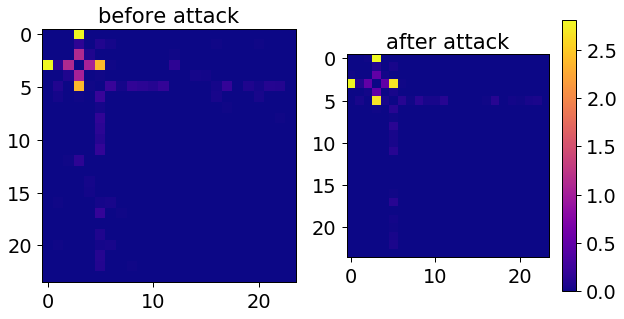

In [38]:
## visualize the adjacency matrix before and after the attack
    
def plot_adj_matrices(A, attacked_A):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    p0 = axes[0].imshow(A, cmap='plasma')
    axes[0].set_title('before attack')
#     fig.colorbar(p0, ax=axes[0])
    p1 = axes[1].imshow(attacked_A, cmap='plasma')
    im = axes[1].set_title('after attack')
    fig.colorbar(p1, ax=axes[1])

#     fig.subplots_adjust(right=0.8)
#     cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
#     fig.colorbar(im, ax=cbar_ax)
    
graph_type = 'Airport'
graph_weight = 'weighted'
numExp = 1 if graph_type in ['Email', 'Airport', 'Protein'] else 30
exp = 0 if graph_type in ['Email', 'Airport'] else 10
Key = 'equalAlpha'
budget = 0.5

with open('../result/{}/min_eigcent_SP/{}_numExp_{}_ret_{}.p'.format(graph_weight, graph_type, numExp, Key), 'rb') as fid:
    data = pickle.load(fid)
Attacker = data[budget][0][-1]

A_attacked = Attacker.get_attacked_adj() 
A = Attacker.original_adj 

# A_attacked /= A_attacked.max()
# A  /= A.max()

S_attacked = get_submatrix(A_attacked, Attacker.S, Attacker.S)
S = get_submatrix(A, Attacker.S, Attacker.S)

bound_attacked = get_submatrix(A_attacked, Attacker.S, Attacker.S_prime)
bound  = get_submatrix(A, Attacker.S, Attacker.S_prime)

# new_idx = torch.cat((Attacker.S, Attacker.S_prime)).numpy()
new_idx = Attacker.S.numpy()
plot_adj_matrices(A.numpy()[np.ix_(new_idx, new_idx)], A_attacked.numpy()[np.ix_(new_idx, new_idx)])

In [39]:
v2 = torch.symeig(0.06 * A_attacked + (1 - 0.24) * torch.eye(len(A_attacked)))[0][-2].numpy()
np.log(len(A_attacked)) / v2

7.358885476198452

In [948]:
from networkx.algorithms.community import greedy_modularity_communities, girvan_newman

G = nx.read_edgelist('../data/US-airport.txt', nodetype=int, data=(('weight',float),) )
comps = nx.connected_components(G)
comp_max_idx = max(comps, key=lambda x: len(x))
G = G.subgraph(comp_max_idx)
mapping = {item: idx for idx, item in enumerate(G.nodes())}
G = nx.relabel_nodes(G, mapping)
# Adj = nx.adjacency_matrix(G).todense() 
# Adj /= Adj.max()
# G = nx.from_numpy_matrix(Adj)

In [949]:
nx.adjacency_matrix(G).todense().max()

1489618.0

In [145]:
### average degree and local clustering coeff.

graph_type = 'Airport'
numExp = 1 if graph_type in ['Email', 'Airport', 'Protein'] else 30
graph_weight = 'weighted'
Key = 'equalAlpha'
mode = 'min_eigcent_SP'
graph_name = ['original', 'attacked']
folder = '../result/{}/{}'.format(graph_weight, mode)
with open(os.path.join(folder, '{}_numExp_{}_attacked_graphs_{}_newcomm_1.p'.format(graph_type, numExp, Key)), 'rb') as fid:
    data = pickle.load(fid)

ret = []
for budget in [0.1, 0.2, 0.3, 0.4, 0.5]:
    for gn in graph_name:
        for exp in range(numExp):
            G = data[budget][exp][gn]
            avg_deg = np.mean([G.degree(i) for i in range(G.order())])
            loc_cluster = nx.average_clustering(G)
            density = nx.density(G)
            S_size = len([i for i in range(G.order()) if G.nodes[i]['target']])
            ret.append((avg_deg, loc_cluster, density, S_size, gn, budget))
ret = pd.DataFrame(ret, columns=['avg. degree', 'loc. cluster', 'density', 'S_size', 'graph', 'budget'])
y = ret.groupby(['graph', 'budget']).mean()
print(y)

                 avg. degree  loc. cluster   density  S_size
graph    budget                                             
attacked 0.1       21.900763      0.504794  0.013941      60
         0.2       21.900763      0.504794  0.013941      60
         0.3       21.900763      0.504794  0.013941      60
         0.4       21.900763      0.504794  0.013941      60
         0.5       21.900763      0.504794  0.013941      60
original 0.1       21.900763      0.504794  0.013941      60
         0.2       21.900763      0.504794  0.013941      60
         0.3       21.900763      0.504794  0.013941      60
         0.4       21.900763      0.504794  0.013941      60
         0.5       21.900763      0.504794  0.013941      60


In [1084]:
graph_type = 'Airport'
graph_weight = 'weighted'
numExp = 1 if graph_type in ['Email', 'Airport'] else 30
exp = 0 if graph_type in ['Email', 'Airport'] else 10
Key = 'equalAlpha'
budget = 0.5
with open('../result/{}/min_eigcent_SP/{}_numExp_{}_attacked_graphs_{}.p'.format(graph_weight, graph_type, numExp, Key), 'rb') as fid:
    data = pickle.load(fid)

In [1085]:
G = data[0.5][0]['original']
G_attacked = data[0.5][0]['attacked']

In [1089]:
G[0][1]

{'weight': 6.041817432388706e-06}

In [1090]:
G_attacked[0][1]

{'weight': 5.393522769736592e-06}